# DATASCI 315, Homework 2: Python Bootcamp

In [1]:
import matplotlib.pyplot as plt
import skimage
import torch

# Part 1: Problem Solving with Python

The first two questions come from [Project Euler](https://projecteuler.net/archives), a site with an archive of interesting mathematical and computational problems.

The third problem is modeled after those found on [LeetCode](https://leetcode.com), a great resource for honing your programming skills.

## (10 pts) Problem 1: Largest Palindrome Product

A palindromic number reads the same both ways. The largest palindrome made from the product of two 2-digit numbers is 9009 = 91 × 99.

Find the largest palindrome made from the product of two 3-digit numbers.

**Hint:** Use string slicing to check if a number is a palindrome.

In [2]:
def three_digit_palindrome():
    # BEGIN SOLUTION
    largest = 0
    for i in range(100, 1000):
        for j in range(i, 1000):  # start from i to avoid duplicate checks
            product = i * j
            if str(product) == str(product)[::-1]:  # check if palindrome
                largest = max(largest, product)
    return largest
    # END SOLUTION

In [3]:
# test your code below
result = three_digit_palindrome()
print(f"Largest palindrome from 3-digit products: {result}")
assert result == 906609, f"Expected 906609, got {result}"

# Additional test cases
# Verify it's actually a palindrome
assert str(result) == str(result)[::-1], "Result should be a palindrome"

# Verify it can be factored into two 3-digit numbers
found_factors = False
for i in range(100, 1000):
    if result % i == 0:
        other = result // i
        if 100 <= other <= 999:
            print(f"Factors: {i} x {other} = {result}")
            found_factors = True
            break
assert found_factors, "Result should be product of two 3-digit numbers"

print("All tests passed!")

# BEGIN HIDDEN TESTS
assert result == 906609, "The largest palindrome from 3-digit products should be 906609"
assert result % 913 == 0, "906609 should be divisible by 913"
assert result // 913 == 993, "906609 divided by 913 should equal 993"
# END HIDDEN TESTS

Largest palindrome from 3-digit products: 906609
Factors: 913 x 993 = 906609
All tests passed!


## (10 pts) Problem 2: n-Digit Fibonacci Number

The Fibonacci sequence is defined by the recurrence relation:

$$F_n = F_{n-1} + F_{n-2}, \quad \text{where } F_1 = 1 \text{ and } F_2 = 1$$

The first 12 terms are: 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144.

The 12th term, $F_{12} = 144$, is the first term to contain three digits.

Write a function that takes a positive integer $n$ and returns the index of the first Fibonacci number that contains $n$ digits.

**Hint:** Use a `while` loop and store the previous two Fibonacci numbers as you iterate. You can find the number of digits using `len(str(number))`.

In [4]:
def nfib(n):
    # BEGIN SOLUTION
    a, b = 1, 1
    index = 1
    while len(str(a)) < n:
        a, b = b, a + b
        index += 1
    return index
    # END SOLUTION

In [5]:
# test your code below
assert nfib(1) == 1, f"Expected 1, got {nfib(1)}"
assert nfib(2) == 7, f"Expected 7, got {nfib(2)}"
assert nfib(3) == 12, f"Expected 12, got {nfib(3)}"
assert nfib(1000) == 4782, f"Expected 4782, got {nfib(1000)}"


# Additional test cases with verification
# Verify nfib(3)=12 means F_12=144 (first 3-digit Fibonacci)
def get_fib(k):
    """Helper to compute the k-th Fibonacci number."""
    a, b = 1, 1
    for _ in range(k - 2):
        a, b = b, a + b
    return b if k > 1 else 1


# Verify F_12 = 144 (3 digits) and F_11 = 89 (2 digits)
assert len(str(get_fib(12))) == 3, "F_12 should have 3 digits"
assert len(str(get_fib(11))) == 2, "F_11 should have 2 digits"
print(f"F_12 = {get_fib(12)} (first 3-digit Fibonacci)")

# Test edge cases
assert nfib(4) == 17, f"Expected 17, got {nfib(4)}"  # F_17 = 1597
print(f"nfib(4) = {nfib(4)}, F_17 = {get_fib(17)}")

print("All tests passed!")

# BEGIN HIDDEN TESTS
assert nfib(5) == 21, f"Expected 21, got {nfib(5)}"
assert nfib(10) == 45, f"Expected 45, got {nfib(10)}"
# END HIDDEN TESTS

F_12 = 144 (first 3-digit Fibonacci)
nfib(4) = 17, F_17 = 1597
All tests passed!


## (20 pts) Problem 3: Stackable Arrays

You are given a list of unique integers. Your task is to build a stack one element at a time following these rules:

1. At each step, you may take either the leftmost or rightmost element from the list and push it onto your stack.
2. You can only continue if the element you are adding is smaller than the element currently on top of the stack (or if the stack is empty).

Write a function that returns `True` if the entire list can be stacked this way, and `False` otherwise.

**Worked example:** `[7, 5, 3, 6, 10]` is stackable:
1. Take 10 (rightmost). Stack: [10]
2. Take 7 (leftmost). 7 < 10 ✓. Stack: [10, 7]
3. Take 6 (rightmost). 6 < 7 ✓. Stack: [10, 7, 6]
4. Take 5 (leftmost). 5 < 6 ✓. Stack: [10, 7, 6, 5]
5. Take 3 (leftmost). 3 < 5 ✓. Stack: [10, 7, 6, 5, 3] ✓

**Why `[2, 5, 6, 3]` is NOT stackable:** Try all possibilities—you will always get stuck.

**Hint:** Consider using recursion.

In [6]:
def is_stackable(array):
    # BEGIN SOLUTION
    def helper(left, right, stack_top):
        if left > right:
            return True

        # Try taking from left
        if array[left] < stack_top:
            if helper(left + 1, right, array[left]):
                return True

        # Try taking from right
        if array[right] < stack_top:
            if helper(left, right - 1, array[right]):
                return True

        return False

    if len(array) == 0:
        return True

    return helper(0, len(array) - 1, float("inf"))
    # END SOLUTION

In [7]:
# test your code below
assert is_stackable([7, 5, 3, 6, 10])
assert not is_stackable([2, 5, 6, 3])
assert is_stackable([1, 2, 3])  # decreasing from right: 3, 2, 1
assert is_stackable([3, 2, 1])  # decreasing from left
assert is_stackable([1])  # single element
assert is_stackable([2, 1, 3])  # take 3, then 2, then 1

# Additional test cases
assert is_stackable([])  # empty array is trivially stackable
assert is_stackable([5, 4, 3, 2, 1])  # strictly decreasing (take from left)
assert is_stackable([1, 2, 3, 4, 5])  # strictly increasing (take from right)
assert is_stackable([10, 1])  # take 10 (L), then 1 (R)
assert not is_stackable([1, 3, 2])  # stuck: after any first move, can't continue
assert not is_stackable([2, 1, 4, 3])  # stuck: 4 blocks completion
assert is_stackable([3, 1, 2])  # take 3, then 2, then 1

print("All tests passed!")

# BEGIN HIDDEN TESTS
assert is_stackable([8, 4, 2, 5, 9]), "Array [8, 4, 2, 5, 9] should be stackable"
assert not is_stackable([3, 7, 4, 2]), "Array [3, 7, 4, 2] should not be stackable"
# END HIDDEN TESTS

All tests passed!


# Part 2: Image Manipulation

Digital images are represented as a grid of pixels, where each pixel has three values: red, green, and blue (RGB). You can read more about digital images [here](https://introcomputing.org/image-introduction.html).

We can represent images as 3D tensors and manipulate them in various ways. Below is a picture of a coffee cup from scikit-image's sample data:

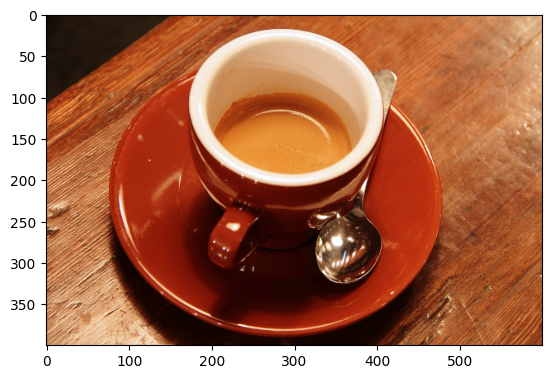

In [8]:
coffee = torch.tensor(skimage.data.coffee(), dtype=torch.float32)
plt.imshow(coffee / 255)
plt.show()

Here's how the image is stored as a PyTorch tensor:

In [9]:
coffee

tensor([[[ 21.,  13.,   8.],
         [ 21.,  13.,   9.],
         [ 20.,  11.,   8.],
         ...,
         [228., 182., 138.],
         [231., 185., 142.],
         [228., 184., 140.]],

        [[ 21.,  13.,   7.],
         [ 21.,  13.,   9.],
         [ 20.,  14.,   7.],
         ...,
         [228., 182., 136.],
         [231., 185., 139.],
         [229., 183., 137.]],

        [[ 21.,  14.,   7.],
         [ 23.,  13.,  10.],
         [ 20.,  14.,   9.],
         ...,
         [228., 182., 136.],
         [228., 184., 137.],
         [229., 185., 138.]],

        ...,

        [[189., 124.,  77.],
         [214., 155., 109.],
         [197., 141., 100.],
         ...,
         [165.,  86.,  37.],
         [161.,  82.,  41.],
         [143.,  67.,  29.]],

        [[207., 148., 102.],
         [201., 142.,  99.],
         [196., 140.,  97.],
         ...,
         [154.,  74.,  37.],
         [147.,  66.,  33.],
         [145.,  65.,  31.]],

        [[197., 141., 100.],
       

The innermost arrays are RGB pixel values (e.g., `[143, 60, 29]` represents one pixel's red, green, and blue values). These pixels are grouped into rows, and the rows are stacked to form the complete image. The tensor has shape `(height, width, 3)`.

Use these helper functions for the following questions:

In [10]:
def show_image(image):
    """Display an image from a PyTorch tensor (values in 0-255 range)."""
    plt.imshow(image / 255)
    plt.show()


def load_coffee():
    """Load the coffee image as a float32 PyTorch tensor (values in 0-255 range)."""
    return torch.tensor(skimage.data.coffee(), dtype=torch.float32)

## (10 pts) Problem 4: Blue Channel Only

Modify the image so that only the blue channel remains. Set the red and green values to 0 for every pixel, keeping the blue values unchanged.

**Expected output:** The image should appear in shades of blue only.

**Hint:** Use tensor slicing to select and modify specific channels. The RGB channels are at index 0, 1, and 2 respectively in the last dimension. Try to solve this without using any `for` loops!

In [11]:
def blue_scale(picture):
    # BEGIN SOLUTION
    result = picture.clone()
    result[:, :, 0] = 0  # Set red channel to 0
    result[:, :, 1] = 0  # Set green channel to 0
    return result
    # END SOLUTION

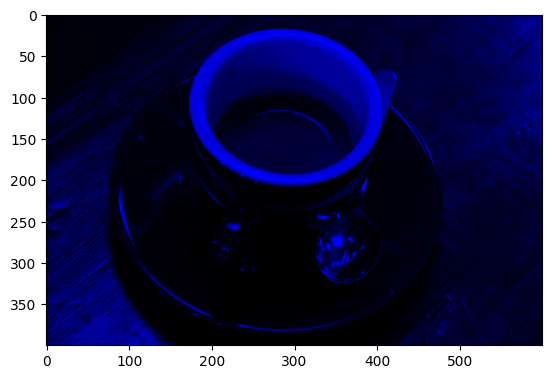

Assertions passed!


In [12]:
# test your code below
coffee = load_coffee()
result = blue_scale(coffee)
show_image(result)

# verify only blue channel has values
assert result[:, :, 0].sum() == 0, "Red channel should be all zeros"
assert result[:, :, 1].sum() == 0, "Green channel should be all zeros"
assert result[:, :, 2].sum() > 0, "Blue channel should have values"

# Additional test cases
# Verify original image is not modified
original = load_coffee()
assert original[:, :, 0].sum() > 0, "Original red channel should be preserved"
assert original[:, :, 1].sum() > 0, "Original green channel should be preserved"

# Verify blue channel is exactly preserved
assert torch.equal(result[:, :, 2], coffee[:, :, 2]), "Blue channel should be unchanged"

# Verify shape is preserved
assert result.shape == coffee.shape, "Shape should be unchanged"

print("Assertions passed!")

# BEGIN HIDDEN TESTS
assert result[:, :, 0].max() == 0, "Red channel maximum should be 0"
assert result[:, :, 1].max() == 0, "Green channel maximum should be 0"
# END HIDDEN TESTS

## (10 pts) Problem 5: RGB Column Stripes

Modify the image so that each column shows only one color channel:
- Column 0: blue only (R=0, G=0, B=original)
- Column 1: red only (R=original, G=0, B=0)
- Column 2: green only (R=0, G=original, B=0)
- Column 3: blue only (pattern repeats)
- This pattern continues for all columns.

**Expected output:** The image should have thin vertical stripes alternating between blue, red, and green tints.

**Hint:** Use the modulo operator `%` to determine which channel to keep for each column index. Tensor slicing with step sizes can help you select every 3rd column: `tensor[:, 0::3]` selects columns 0, 3, 6, etc.

In [13]:
def columns_rgb(picture):
    # BEGIN SOLUTION
    result = picture.clone()
    # Column 0, 3, 6, ... -> blue only (R=0, G=0)
    result[:, 0::3, 0] = 0  # R = 0
    result[:, 0::3, 1] = 0  # G = 0
    # Column 1, 4, 7, ... -> red only (G=0, B=0)
    result[:, 1::3, 1] = 0  # G = 0
    result[:, 1::3, 2] = 0  # B = 0
    # Column 2, 5, 8, ... -> green only (R=0, B=0)
    result[:, 2::3, 0] = 0  # R = 0
    result[:, 2::3, 2] = 0  # B = 0
    return result
    # END SOLUTION

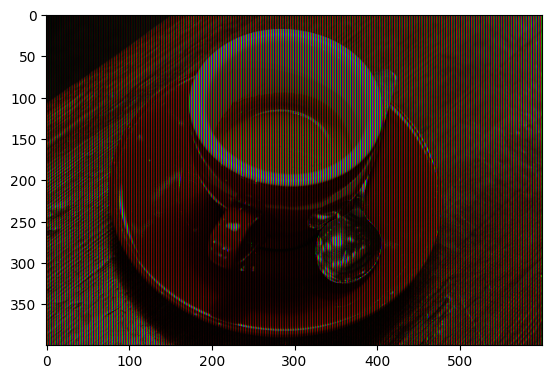

Assertions passed!


In [14]:
# test your code below
coffee = load_coffee()
result = columns_rgb(coffee)
show_image(result)

# verify the pattern: column 0 should be blue only, column 1 red only, etc.
assert result[0, 0, 0] == 0, "Column 0 should have R=0"
assert result[0, 0, 1] == 0, "Column 0 should have G=0"
assert result[0, 1, 1] == 0, "Column 1 should have G=0"
assert result[0, 1, 2] == 0, "Column 1 should have B=0"
assert result[0, 2, 0] == 0, "Column 2 should have R=0"
assert result[0, 2, 2] == 0, "Column 2 should have B=0"

# Additional test cases
# Verify pattern repeats for columns 3, 4, 5
assert result[0, 3, 0] == 0, "Column 3 should have R=0"
assert result[0, 3, 1] == 0, "Column 3 should have G=0"
assert result[0, 4, 1] == 0, "Column 4 should have G=0"
assert result[0, 4, 2] == 0, "Column 4 should have B=0"
assert result[0, 5, 0] == 0, "Column 5 should have R=0"
assert result[0, 5, 2] == 0, "Column 5 should have B=0"

# Verify preserved values match original
original = load_coffee()
assert result[0, 0, 2] == original[0, 0, 2], "Column 0 blue should match original"
assert result[0, 1, 0] == original[0, 1, 0], "Column 1 red should match original"
assert result[0, 2, 1] == original[0, 2, 1], "Column 2 green should match original"

# Verify shape is preserved
assert result.shape == coffee.shape, "Shape should be unchanged"

print("Assertions passed!")

# BEGIN HIDDEN TESTS
assert result[50, 6, 0] == 0, "Column 6 should have R=0 (blue only pattern)"
assert result[50, 6, 1] == 0, "Column 6 should have G=0 (blue only pattern)"
assert result[50, 7, 1] == 0, "Column 7 should have G=0 (red only pattern)"
assert result[50, 7, 2] == 0, "Column 7 should have B=0 (red only pattern)"
# END HIDDEN TESTS

## (10 pts) Problem 6: Vertical Flip

Flip the image vertically (upside down). The top row should become the bottom row, and vice versa.

**Expected output:** The coffee cup should appear upside down.

**Restriction:** Do not use `torch.flip`—solve this using indexing instead.

**Hint:** Use integer tensor indexing with `torch.arange`. To reverse a dimension, create an index tensor that counts backwards: `torch.arange(n-1, -1, -1)` produces `[n-1, n-2, ..., 1, 0]`. Then use this tensor to index into the rows of the image. This can be done in a single line without any loops!

In [15]:
def flip_vert(picture):
    # BEGIN SOLUTION
    n = picture.shape[0]
    indices = torch.arange(n - 1, -1, -1)
    return picture[indices]
    # END SOLUTION

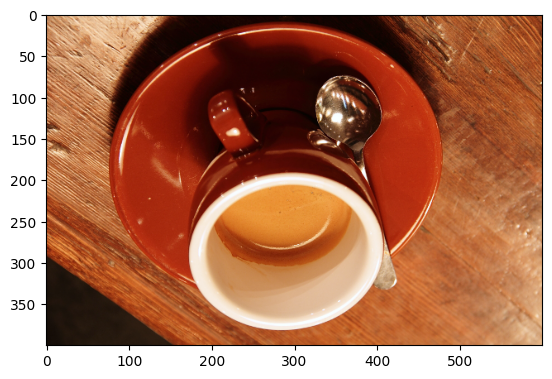

Assertions passed!


In [16]:
# test your code below
coffee = load_coffee()
result = flip_vert(coffee)
show_image(result)

# verify the flip: first row of result should equal last row of original
original = load_coffee()
assert torch.equal(result[0], original[-1]), (
    "First row should equal original's last row"
)
assert torch.equal(result[-1], original[0]), (
    "Last row should equal original's first row"
)

# Additional test cases
# Verify middle row mapping
mid = original.shape[0] // 2
assert torch.equal(result[mid], original[-(mid + 1)]), (
    "Middle rows should be swapped correctly"
)

# Verify shape is preserved
assert result.shape == original.shape, "Shape should be unchanged"

# Verify double flip returns to original
double_flip = flip_vert(result)
assert torch.equal(double_flip, original), "Double flip should return original"

print("Assertions passed!")

# BEGIN HIDDEN TESTS
assert torch.equal(result[10], original[-11]), "Row 10 should equal original row -11"
assert torch.equal(result[100], original[-101]), "Row 100 mismatch"
# END HIDDEN TESTS

## (10 pts) Problem 7: Cropping

Crop the image to include only rows 100–200 and columns 100–400 (using 0-based indexing, inclusive on both ends).

**Expected output:** A smaller image showing just a portion of the original (should be 101 rows × 301 columns).

**Hint:** Use 2D slice notation. Remember that `a:b` in Python includes index `a` but excludes index `b`, so you'll need to adjust accordingly.

In [17]:
def crop_pic(picture):
    # BEGIN SOLUTION
    return picture[100:201, 100:401, :]
    # END SOLUTION

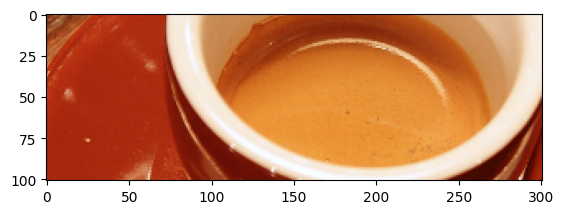

Assertions passed!


In [18]:
# test your code below
coffee = load_coffee()
result = crop_pic(coffee)
show_image(result)

# verify dimensions
assert result.shape == (101, 301, 3), (
    f"Expected shape (101, 301, 3), got {result.shape}"
)
# verify content matches the original region
original = load_coffee()
assert torch.equal(result[0, 0], original[100, 100]), (
    "Top-left pixel should match original[100, 100]"
)

# Additional test cases
# Verify corners of cropped region match original
assert torch.equal(result[-1, -1], original[200, 400]), (
    "Bottom-right pixel should match original[200, 400]"
)
assert torch.equal(result[0, -1], original[100, 400]), (
    "Top-right pixel should match original[100, 400]"
)
assert torch.equal(result[-1, 0], original[200, 100]), (
    "Bottom-left pixel should match original[200, 100]"
)

# Verify entire cropped region matches
assert torch.equal(result, original[100:201, 100:401, :]), (
    "Entire cropped region should match"
)

print("Assertions passed!")

# BEGIN HIDDEN TESTS
assert torch.equal(result[50, 150], original[150, 250]), "Middle pixel mismatch"
assert result.shape[2] == 3, "Cropped image should have 3 color channels"
# END HIDDEN TESTS

## (20 pts) Problem 8: Box Blur

One way to blur an image is to replace each pixel's RGB values with the average of the RGB values of its neighboring pixels.

Implement a box blur where each pixel is replaced by the average of an 11×11 region centered on that pixel (5 pixels in each direction, plus the pixel itself). Only compute output pixels where the full 11×11 window fits within the image—do not pad the boundaries.

**Expected output:** A blurry image that is slightly smaller than the original (10 fewer pixels in each dimension, since we lose 5 pixels on each edge).

**Two possible approaches:**

1. **Loop approach:** Use nested `for` loops to iterate over valid pixel positions (from 5 to height-5, and 5 to width-5). For each position, extract the 11×11 region and compute the mean.

2. **Vectorized approach (advanced):** Use `Tensor.unfold()` to extract all 11×11 windows at once, then compute the mean across each window using `Tensor.mean()`.

In [19]:
def average_blur_rgb(image):
    # BEGIN SOLUTION
    h, w, c = image.shape
    new_h = h - 10
    new_w = w - 10
    result = torch.zeros((new_h, new_w, c), dtype=torch.float32)

    for i in range(new_h):
        for j in range(new_w):
            window = image[i:i+11, j:j+11, :]
            result[i, j] = window.mean(dim=(0, 1))

    return result
    # END SOLUTION

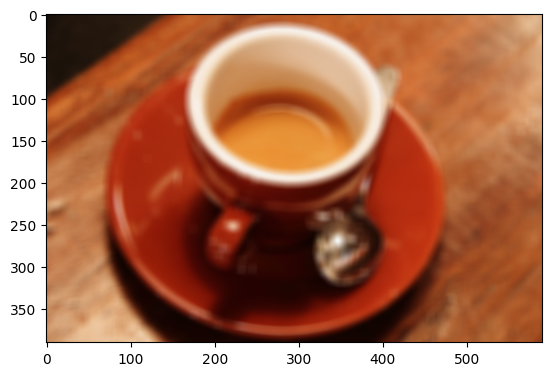

Original shape: torch.Size([400, 600, 3])
Blurred shape: torch.Size([390, 590, 3])
Assertions passed!


In [20]:
# test your code below
coffee = load_coffee()
result = average_blur_rgb(coffee)
show_image(result)

# verify output shape is 10 pixels smaller in each dimension
expected_shape = (coffee.shape[0] - 10, coffee.shape[1] - 10, 3)
assert result.shape == expected_shape, (
    f"Expected shape {expected_shape}, got {result.shape}"
)
# verify output is float32
assert result.dtype == torch.float32, f"Expected float32, got {result.dtype}"

# Additional test cases
original = load_coffee()
print(f"Original shape: {original.shape}")
print(f"Blurred shape: {result.shape}")

# Verify values are in valid range
assert result.min() >= 0, "Values should be >= 0"
assert result.max() <= 255, "Values should be <= 255"

# Verify first output pixel corresponds to mean of first 11x11 window
window = original[0:11, 0:11, :]
expected_first = window.mean(dim=(0, 1))
assert torch.allclose(result[0, 0], expected_first), (
    "First pixel should be mean of first 11x11 window"
)

print("Assertions passed!")

# BEGIN HIDDEN TESTS
window_last = original[-11:, -11:, :]
expected_last = window_last.mean(dim=(0, 1))
assert torch.allclose(result[-1, -1], expected_last), "Last pixel wrong"
window_mid = original[50:61, 100:111, :]
expected_mid = window_mid.mean(dim=(0, 1))
assert torch.allclose(result[50, 100], expected_mid), "Mid pixel wrong"
# END HIDDEN TESTS